In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('dataset/Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Check qty of Unique each columns
for i in df:
    print(i, df[i].nunique())

ID 5000
Age 45
Experience 47
Income 162
ZIP Code 467
Family 4
CCAvg 108
Education 3
Mortgage 347
Personal Loan 2
Securities Account 2
CD Account 2
Online 2
CreditCard 2


In [5]:
# Check type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Check null values in dataframe
df.isnull().sum()

# there is no empty value on dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# drop unnecessary column

unnecessary_col = ['ID', 'ZIP Code']
df.drop(unnecessary_col, axis =1, inplace=True)

In [9]:
(df['Personal Loan'].value_counts()/len(df)).astype('str') + '%'

0    0.904%
1    0.096%
Name: Personal Loan, dtype: object

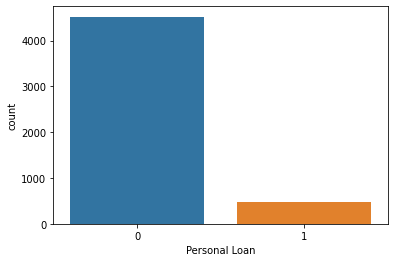

In [10]:
sns.countplot(df['Personal Loan'])
plt.show()

In [11]:
# lets a lil bit take a look about the data

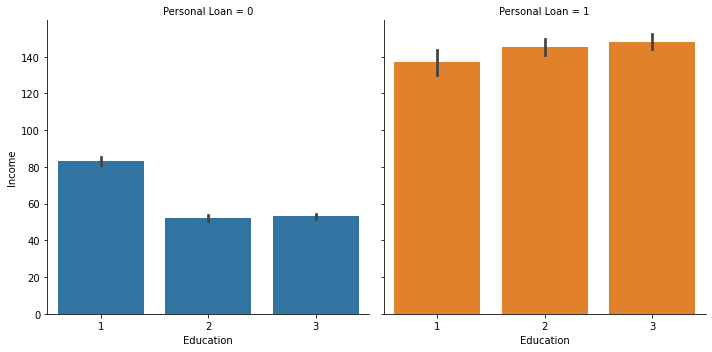

In [12]:
g = sns.FacetGrid(df, col='Personal Loan', height = 5, hue='Personal Loan')
g.map(sns.barplot, 'Education', 'Income', order = sorted(df['Education'].unique()))
plt.show()

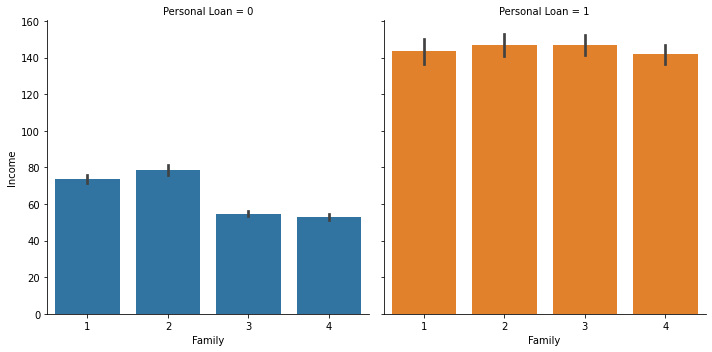

In [13]:
g = sns.FacetGrid(df, col='Personal Loan', height = 5, hue='Personal Loan')
g.map(sns.barplot, 'Family', 'Income', order = sorted(df['Family'].unique()))
plt.show()

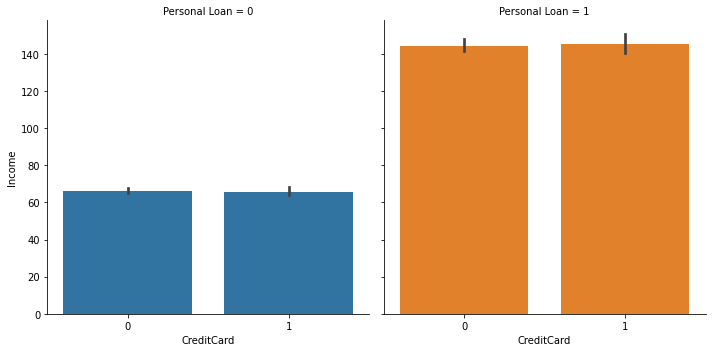

In [14]:
g = sns.FacetGrid(df, col='Personal Loan', height = 5, hue='Personal Loan')
g.map(sns.barplot, 'CreditCard', 'Income', order = sorted(df['CreditCard'].unique()))
plt.show()

Based on 3 plot above, we can get that, Income is very affecting the Personal loan, as we see the average of 
income between Education, family, Credit card on personal loan (1) is higher than average income on personal loan (0)

## Build random forest to know which IDV that has effect the most

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
X = df.drop('Personal Loan', axis =1)
y = df['Personal Loan']

In [17]:
rfc = RandomForestClassifier(n_estimators=1000, oob_score=True)

In [18]:
rfc.fit(X, y)

RandomForestClassifier(n_estimators=1000, oob_score=True)

In [19]:
rfc.oob_score_

0.9878

In [20]:
X.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [21]:
ft_importances = rfc.feature_importances_
ft_importances

array([0.03551668, 0.03447626, 0.34326821, 0.11473226, 0.16681418,
       0.20362795, 0.03058845, 0.00409396, 0.0521889 , 0.00693275,
       0.00776039])

In [22]:
rfc_ft_df = pd.DataFrame(data= ft_importances, index= X.columns, columns=['Value']).sort_values('Value', ascending = False)
rfc_ft_df

,Value
Income,0.343268
Education,0.203628
CCAvg,0.166814
Family,0.114732
CD Account,0.052189
Age,0.035517
Experience,0.034476
Mortgage,0.030588
CreditCard,0.007760
Online,0.006933


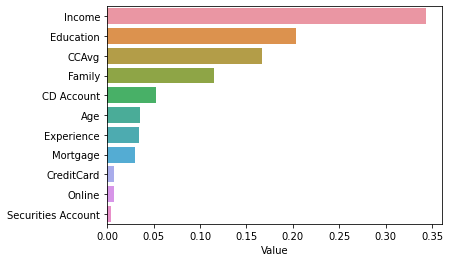

In [23]:
sns.barplot(x=rfc_ft_df.Value, y = rfc_ft_df.index )
plt.show()

as we can see the top 4 of important features are Income, Education, CCAvg, Family

In [24]:
# Now we can build a decision tree with these 4 features

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [26]:
dtc = DecisionTreeClassifier(max_depth= 8, max_features=4, max_leaf_nodes= 10)

In [27]:
X_impt = df[['Income', 'Education', 'CCAvg', 'Family']]

In [28]:
print(dtc.fit(X_impt, y))
dtc.score(X_impt, y)

DecisionTreeClassifier(max_depth=8, max_features=4, max_leaf_nodes=10)


0.9846

In [29]:
score = accuracy_score(dtc.predict(X_impt), y)
score

0.9846

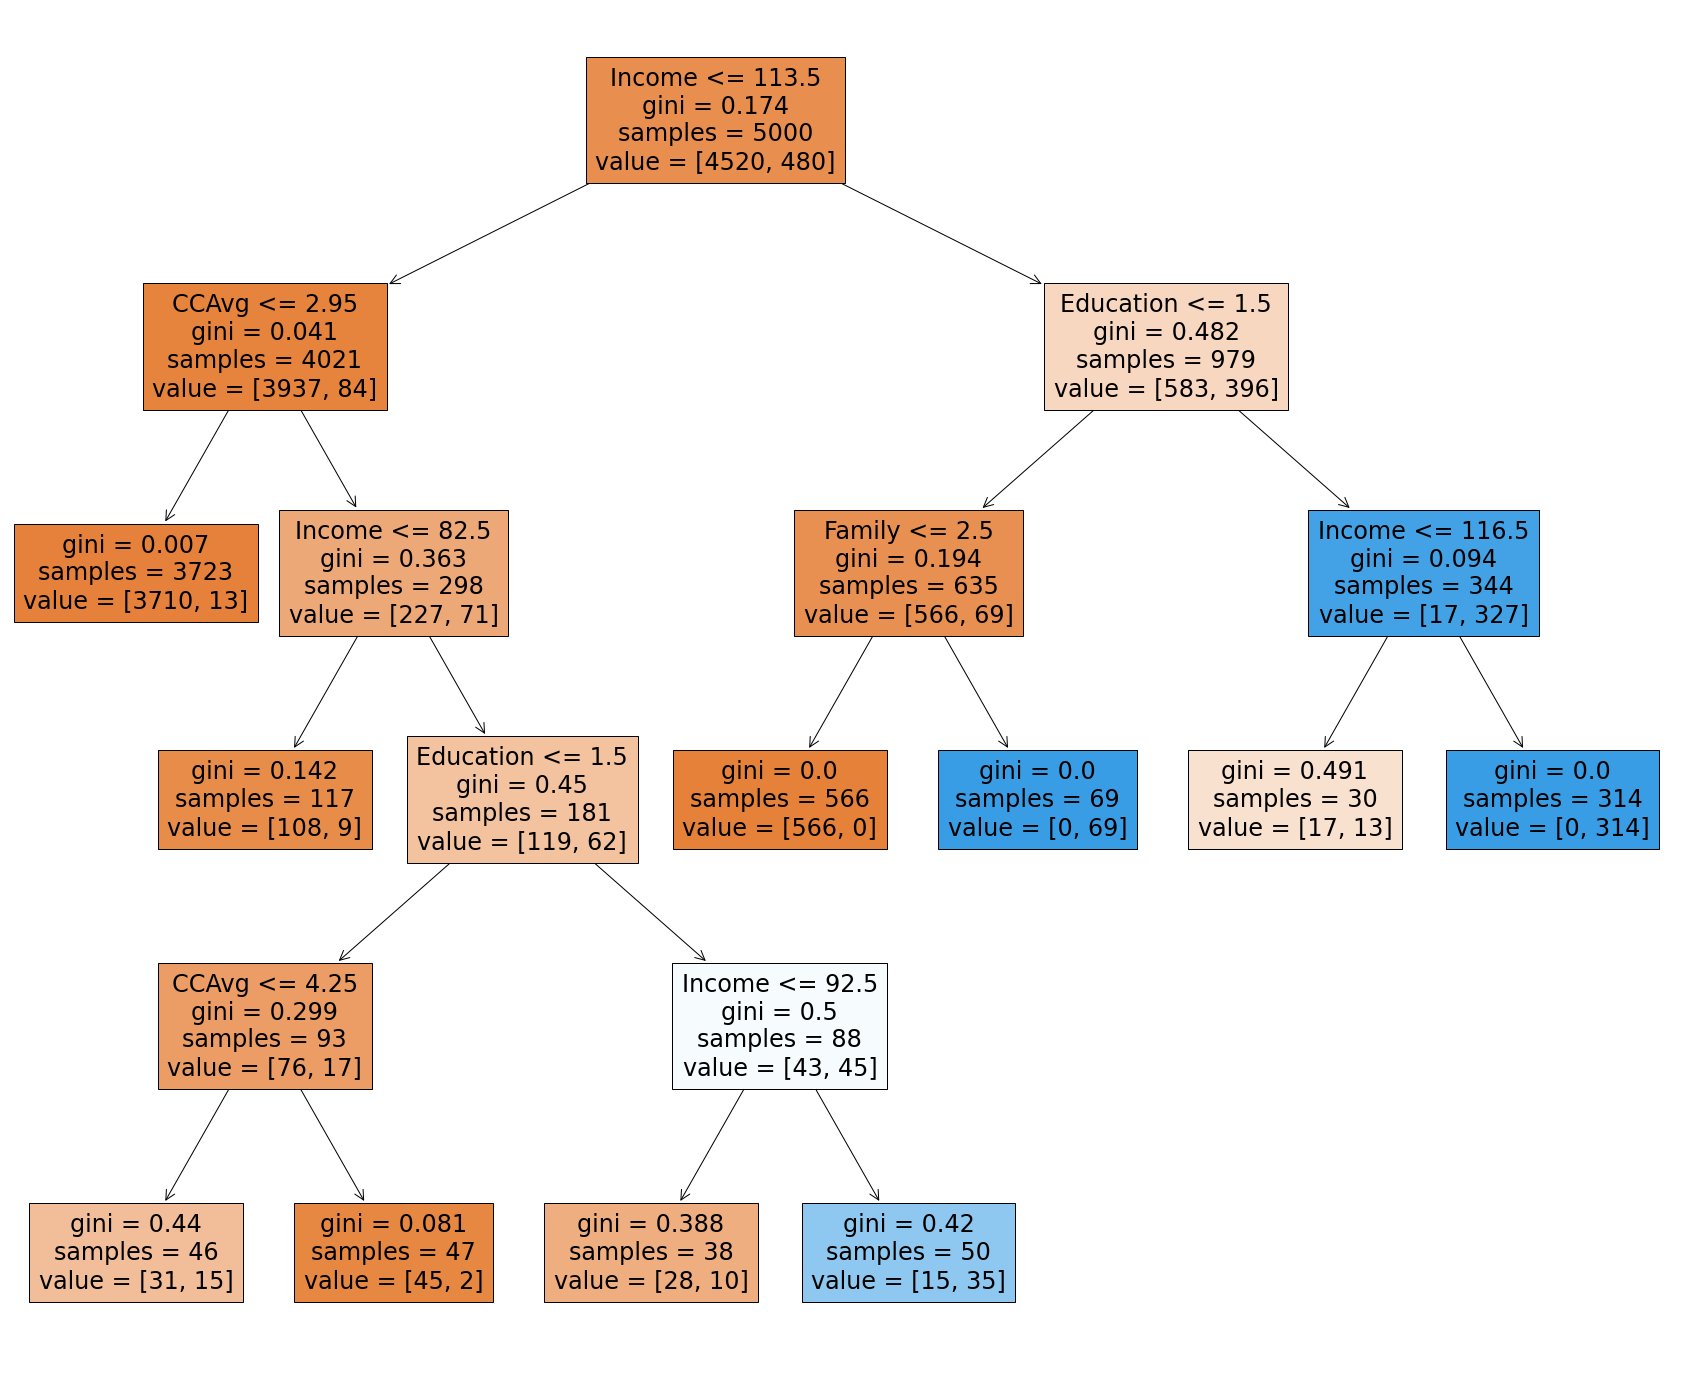

In [30]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(dtc, 
                   feature_names=X_impt.columns,
                   filled=True)

In [31]:
fig.savefig("decistion_tree_BankLoan.png")

### Rule for Decission Tree

- if education > 1.5 and income > 116.5, personal loan (1)
- if education > 1.5 and income <= 116.5, personal loan (0)
- if income > 113.5 and Education <= 1.5 and family > 2.5, personal loan (1)
- if income > 113.5 and Education <= 1.5 and family <= 2.5, personal loan (0)
- if income <= 113.5 and CCAvg <= 2.95, personal loan (0)
- if income <= 113.5 and CCAvg > 2.95 and Income <= 82.5, personal loan (0)
- if income <= 113.5 and CCAvg > 2.95 and Income > 82.5 and Education > 1.5 and Income > 92.5, personal loan (1)
- if income <= 113.5 and CCAvg > 2.95 and Income > 82.5 and Education > 1.5 and Income <= 92.5, personal loan (0)
- if income <= 113.5 and CCAvg > 2.95 and Income > 82.5 and Education <= 1.5 and CCAvg <=  4.25,  personal loan (0)
- if income <= 113.5 and CCAvg > 2.95 and Income > 82.5 and Education <= 1.5 and CCAvg >  4.25,  personal loan (0)
